<a id='intro'></a>
<div class="alert alert-block alert-warning"> 
<h1 align="center">Introduction</h3>
</div>

> Now that I have compiled a dataset of matches from the API, I will perform the necessary steps to compute and visualize the win rates and pick rates of each character.

> First, I will perform [Exploratory Data Analysis](#eda) to get a sense of what I am working.

> Next, I will compute the [Character Statistics](#char_stats) for each character by format and game mode.

> Next, I will perform [Inferential Statistics](#inf) to verify any statistically significant differences in win rates and pick rates between formats (casual vs. ranked) and game modes (2v2 vs. 3v3).

<a id='eda'></a>
<div class="alert alert-block alert-warning"> 
<h1 align="center">Exploratory Data Analysis</h3>
</div>

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

<a id='eda1'></a>
### Check if the match data includes every character
#### Description:
> I need to make sure my dataset includes every character, since this is the most important part of the project.

#### Procedure:
> Using the mappings found in the **character_names** dataframe, I will pair the ID of each character to the corresponding name in the **match_df** dataframe, then ensure that the dataset includes data for each character.
1. Assign each row of the match data with the corresponding character name
2. Build a function to check for missing characters
3. Build a function to check for missing characters for all game modes
4. Find missing characters for each format and game mode combination

##### 1. Assign each row of the match data with the corresponding character name

In [2]:
# Load data
match_df = pd.read_csv('compiled_data\match_data', parse_dates=['date'])
character_names = pd.read_csv('compiled_data\character_names')

# Merge the data using the character ids
match_df = match_df.merge(character_names, left_on='character', right_on='characterID')

# Replace the 'character' column with the 'name' column
match_df['character'] = match_df['name']

# Drop unnecessary columns
match_df = match_df.drop(columns=['characterID', 'name'])

match_df.head()

,character,date,game_mode,league,match_id,ranked,win
0,Lucie,2018-01-01 00:00:03,3V3,1,18E42344815440E3BC148E93658B0E2C,False,False
1,Lucie,2018-01-01 00:00:05,2V2,3,7AF171370D804737BEC036A41A369BBF,False,False
2,Lucie,2018-01-01 00:00:11,2V2,0,8CB6BA4D019E4FAC9D713BAA1D0C20B2,False,False
3,Lucie,2018-01-01 00:00:11,2V2,3,E7F34F0CF2694C7597B973FAF2D31E03,False,True
4,Lucie,2018-01-01 00:00:21,3V3,1,210B90DBDD6A4A23AEC467BDEC6C6980,True,False


##### 2. Build a function to check for missing characters

In [3]:
# Create an array of all the characters
all_characters = sorted(character_names.name.values)

def missing_character(df, total_characters=all_characters):
    '''Find missing characters'''
    # Included characters included in match data
    included_characters = df.character.unique()
    # Missing characters
    missing_characters = set(total_characters).difference(set(included_characters))
    
    return sorted(missing_characters)

##### 3. Build a function to check for missing characters for all game modes

In [4]:
def missing_game_mode(df, characters, format_str):
    '''Find missing characters for each game mode'''   
    # Initialize list of data
    df_2v2 = df.loc[df.game_mode == '2V2']
    df_3v3 = df.loc[df.game_mode == '3V3']
    data = [df, df_2v2, df_3v3]
    
    # Initialize list of game modes
    game_modes = ['overall', '2v2', '3v3']
    
    # Print the format
    print('Format : {}'.format(format_str))
    
    # Loop through each game mode
    for i in range(3):
        # Print the game mode
        print('Game mode: {}'.format(game_modes[i]))
        
        # Find missing characters
        missing = missing_character(data[i], characters)
        
        # Print the missing characters
        if missing:
            # Store all missing characters in a string
            missing_char_str = ', '.join(sorted(missing))
            # Print which characters are missing
            print('   Missing (amount): {}'.format(len(missing)))
            print('   Missing characters: {}'.format(missing_char_str))
        else:
            print('   Missing characters: None') 
    print('')

##### 4. Find missing characters for each format and game mode combination

In [5]:
'''All matches'''
missing_game_mode(match_df, all_characters, 'overall')

'''Casual matches'''
casual = match_df.loc[match_df.ranked == False]
missing_game_mode(casual, all_characters, 'casual')

'''Ranked matches'''
ranked = match_df.loc[match_df.ranked == True]
missing_game_mode(ranked, all_characters, 'ranked')

'''League matches'''
bronze = ranked.loc[ranked.league == 0]
silver = ranked.loc[ranked.league == 1]
gold = ranked.loc[ranked.league == 2]
platinum = ranked.loc[ranked.league == 3]
diamond = ranked.loc[ranked.league == 4]
champion = ranked.loc[ranked.league == 5]
grand_champ = ranked.loc[ranked.league == 6]

# Initialize a list of all leagues
league_list = [bronze, silver, gold, platinum, diamond, champion, grand_champ]
# Initialize a list of all league names
league_names = ['bronze', 'silver', 'gold', 'platinum', 'diamond', 'champion', 'grand_champ']
for i in range(7):
    league = league_list[i]
    league_name = league_names[i]
    missing_game_mode(league, all_characters, league_name)

Format : overall
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : casual
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : ranked
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : bronze
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing (amount): 1
   Missing characters: Taya
Game mode: 3v3
   Missing (amount): 2
   Missing characters: Lucie, Varesh

Format : silver
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing (amount): 1
   Missing characters: Varesh

Format : gold
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : platinum
Gam

> It seems the data is too sparse, and is missing a large number of characters in the higher leagues.

> I'll have to collect more data, and try again.

<a id='eda1'></a>
### Import newly collected data, and repeat
#### Description:
> I will import my new dataset and ensure that there are less missing characters.

#### Procedure:
> Using the mappings found in the **character_names** dataframe, I will pair the ID of each character to the corresponding name in the **match_df** dataframe, then ensure that the dataset includes data for each character.
1. Assign each row of the match data with the corresponding character name
2. Find missing characters for each format and game mode combination

##### 1. Assign each row of the match data with the corresponding character name

In [6]:
# Load data
match_df = pd.read_csv('compiled_data\match_data2', parse_dates=['date'])

# Merge the data using the character ids
match_df = match_df.merge(character_names, left_on='character', right_on='characterID')

# Replace the 'character' column with the 'name' column
match_df['character'] = match_df['name']

# Drop unnecessary columns
match_df = match_df.drop(columns=['characterID', 'name'])

match_df.head()

,character,date,game_mode,league,match_id,ranked,win
0,Lucie,2018-01-01 00:00:03,3V3,1,18E42344815440E3BC148E93658B0E2C,False,False
1,Lucie,2018-01-01 00:00:05,2V2,3,7AF171370D804737BEC036A41A369BBF,False,False
2,Lucie,2018-01-01 00:00:11,2V2,0,8CB6BA4D019E4FAC9D713BAA1D0C20B2,False,False
3,Lucie,2018-01-01 00:00:11,2V2,3,E7F34F0CF2694C7597B973FAF2D31E03,False,True
4,Lucie,2018-01-01 00:00:21,3V3,1,210B90DBDD6A4A23AEC467BDEC6C6980,True,False


##### 2. Find missing characters for each format and game mode combination

In [7]:
'''All matches'''
missing_game_mode(match_df, all_characters, 'overall')

'''Casual matches'''
casual = match_df.loc[match_df.ranked == False]
missing_game_mode(casual, all_characters, 'casual')

'''Ranked matches'''
ranked = match_df.loc[match_df.ranked == True]
missing_game_mode(ranked, all_characters, 'ranked')

'''League matches'''
bronze = ranked.loc[ranked.league == 0]
silver = ranked.loc[ranked.league == 1]
gold = ranked.loc[ranked.league == 2]
platinum = ranked.loc[ranked.league == 3]
diamond = ranked.loc[ranked.league == 4]
champion = ranked.loc[ranked.league == 5]
grand_champ = ranked.loc[ranked.league == 6]

# Initialize a list of all leagues
league_list = [bronze, silver, gold, platinum, diamond, champion, grand_champ]
# Initialize a list of all league names
league_names = ['bronze', 'silver', 'gold', 'platinum', 'diamond', 'champion', 'grand_champ']
for i in range(7):
    league = league_list[i]
    league_name = league_names[i]
    missing_game_mode(league, all_characters, league_name)

Format : overall
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : casual
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : ranked
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : bronze
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : silver
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : gold
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters: None
Game mode: 3v3
   Missing characters: None

Format : platinum
Game mode: overall
   Missing characters: None
Game mode: 2v2
   Missing characters

> Great! Among all the format and game mode combinations, there is only one missing character, which is good enough to being the analysis.

<a id='char_stats'></a>
<div class="alert alert-block alert-warning"> 
<h1 align="center">Character Statistics</h3>
</div>

<a id='char_stats1'></a>
### Win rates
#### Description:
> I will compute the win rates for each character by format and game mode.

#### Procedure:
> 1. Build a function to compute the win rates
2. Compute the win rates for each format and game mode combination

##### 1. Build a function to compute the win rates

In [8]:
def win_rates(df, format_str=None, mode_str=None, check_missing=True):
    '''
    Returns the win rates of the input DataFrame
    '''
    # Find the win rates
    temp = df.groupby('character').win.sum() / df.groupby('character').win.count()

    # Rename 'win' column to 'win_rate'
    win_rates = pd.DataFrame(temp).reset_index().rename(columns={'win':'win_rate'})
    
    if check_missing:
        # Check for missing characters
        missing = missing_character(df)
        if missing:
            # Create a dataframe of missing characters
            df_missing = pd.DataFrame({'character':missing, 'win_rate':[np.nan]*len(missing)})
            # Append missing characters
            win_rates = win_rates.append(df_missing, ignore_index=True)
            # Sort by 'character' column
            win_rates.sort_values(by=['character'])
    
    if format_str and mode_str:
        # Add 'format' and 'game_mode' column
        win_rates['format'] = format_str
        win_rates['game_mode'] = mode_str
    
    return win_rates

##### 2. Compute the win rates for each format and game mode combination

In [10]:
def game_mode_win_rates(df, format_str, check_missing=True):
    output = win_rates(df, format_str, 'overall', check_missing)
    game_modes = ['2V2', '3V3']
    for game_mode in game_modes:
        df_game_mode = df.loc[df.game_mode ==  game_mode]
        temp = win_rates(df_game_mode, format_str, game_mode, check_missing)
        output = pd.concat([output, temp], ignore_index=True)
    
    return output

'''Overall win rates'''
overall_win_rates = game_mode_win_rates(match_df, 'overall')

'''Casual win rates'''
casual_win_rates = game_mode_win_rates(casual, 'casual')

'''Ranked win rates'''
ranked_win_rates = game_mode_win_rates(ranked, 'ranked')

'''League win rates'''
# Initialize a list of all leagues
league_list = [bronze, silver, gold, platinum, diamond, champion, grand_champ]
# Initialize a list of all league names
league_names = ['bronze', 'silver', 'gold', 'platinum', 'diamond', 'champion', 'grand_champ']
# Intitalize empty dataframe to store win rates for each league
league_win_rates = pd.DataFrame()
for i in range(7):
    league = league_list[i]
    league_name = league_names[i]
    temp = game_mode_win_rates(league, league_name)
    league_win_rates = pd.concat([league_win_rates, temp], ignore_index=True)

'''Combine all win rates'''
combined_win_rates = pd.concat([overall_win_rates, casual_win_rates, ranked_win_rates, league_win_rates], ignore_index=True)
#combined_win_rates.to_csv('compiled_data\combined_win_rates', index=False)

combined_win_rates.head()

,character,win_rate,format,game_mode
0,Alysia,0.497414,overall,overall
1,Ashka,0.500149,overall,overall
2,Bakko,0.498924,overall,overall
3,Blossom,0.507330,overall,overall
4,Croak,0.516267,overall,overall


<a id='char_stats2'></a>
### Pick rates
#### Description:
> I will compute the pick rates for each character by format and game mode.

#### Procedure:
> 1. Build a function to compute the pick rates
2. Compute the pick rates for each format and game mode combination

##### 1. Build a function to compute the pick rates

In [11]:
def pick_rates(df, format_str, mode_str, check_missing=True):
    '''
    Returns the win rates of the input DataFrame
    '''
    # Find the overall pick rates
    temp = df.groupby('character').win.count() / df.win.count()

    # Rename 'win' column to 'pick_rate
    pick_rates = pd.DataFrame(temp).reset_index().rename(columns={'win':'pick_rate'})
    
    if check_missing:
        # Check for missing characters
        missing = missing_character(df)
        if missing:
            # Create a dataframe of missing characters
            df_missing = pd.DataFrame({'character':missing, 'pick_rate':[np.nan]*len(missing)})
            # Append missing characters
            pick_rates = pick_rates.append(df_missing, ignore_index=True)
            # Sort by 'character' column
            pick_rates.sort_values(by=['character'])

    # Add 'format' and 'game_mode' column
    pick_rates['format'] = format_str
    pick_rates['game_mode'] = mode_str
    
    return pick_rates

##### 2. Compute the pick rates for each format and game mode combination

In [12]:
def game_mode_pick_rates(df, format_str, check_missing=True):
    output = pick_rates(df, format_str, 'overall', check_missing)
    game_modes = ['2V2', '3V3']
    for game_mode in game_modes:
        df_game_mode = df.loc[df.game_mode ==  game_mode]
        temp = pick_rates(df_game_mode, format_str, game_mode, check_missing)
        output = pd.concat([output, temp], ignore_index=True)
    
    return output

'''Overall pick rates'''
overall_pick_rates = game_mode_pick_rates(match_df, 'overall')

'''Casual pick rates'''
casual_pick_rates = game_mode_pick_rates(casual, 'casual')

'''Ranked pick rates'''
ranked_pick_rates = game_mode_pick_rates(ranked, 'ranked')

'''League pick rates'''
# Initialize a list of all leagues
league_list = [bronze, silver, gold, platinum, diamond, champion, grand_champ]
# Initialize a list of all league names
league_names = ['bronze', 'silver', 'gold', 'platinum', 'diamond', 'champion', 'grand_champ']
# Intitalize empty dataframe to store win rates for each league
league_pick_rates = pd.DataFrame()
for i in range(7):
    league = league_list[i]
    league_name = league_names[i]
    temp = game_mode_pick_rates(league, league_name)
    league_pick_rates = pd.concat([league_pick_rates, temp], ignore_index=True)

'''Combine all pick rates'''
combined_pick_rates = pd.concat([overall_pick_rates, casual_pick_rates, ranked_pick_rates, league_pick_rates], ignore_index=True)
#combined_pick_rates.to_csv('compiled_data\combined_pick_rates', index=False)

combined_pick_rates.head()

,character,pick_rate,format,game_mode
0,Alysia,0.036779,overall,overall
1,Ashka,0.059727,overall,overall
2,Bakko,0.038657,overall,overall
3,Blossom,0.041150,overall,overall
4,Croak,0.052889,overall,overall


<a id='char_stats3'></a>
### Statistics table
#### Description:
> I will display the statistics in a table to easily view the win rates and pick rates of each character by format and game mode.

#### Procedure:
> Create separate tables to view the win rates and pick rates, and then create a combined table to view both statistics.
1. Create a win rates table
2. Create a pick rates table
3. Create a combined table

##### 1. Create a win rates table

In [13]:
# Group by 'character', 'game_mode', and 'format and get pick rates
win_rates_table = combined_win_rates.groupby(['character', 'game_mode', 'format']).agg({'win_rate':'unique'})
# Get pick rate values
win_rates_table = win_rates_table.win_rate.apply(lambda x: x[0])
# Convert to table for easy viewing
win_rates_table = win_rates_table.unstack(level=2)
# Rearrange columns
columns = ['overall', 'casual', 'ranked', 'bronze', 'silver', 'gold', 'platinum', 'diamond', 'champion', 'grand_champ']
win_rates_table = win_rates_table.loc[:, columns]
# Add 'win_rate' level to the columns
win_rates_table.columns = pd.MultiIndex.from_product([['win_rate'], win_rates_table.columns], names=['stat', 'format'])

win_rates_table.head()

stat                 win_rate                                          \
format                overall    casual    ranked    bronze    silver   
character game_mode                                                     
Alysia    2V2        0.493289  0.501329  0.482524  0.432343  0.504769   
          3V3        0.503205  0.514226  0.482873  0.517442  0.488333   
          overall    0.497414  0.507089  0.482653  0.463158  0.499462   
Ashka     2V2        0.494462  0.508079  0.465495  0.469363  0.448759   
          3V3        0.508435  0.513175  0.495421  0.468384  0.481959   

stat                                                                     
format                   gold  platinum   diamond  champion grand_champ  
character game_mode                                                      
Alysia    2V2        0.487903  0.464891  0.425926  0.133333         1.0  
          3V3        0.482927  0.477419  0.404255  0.500000         0.0  
          overall    0.485999  0.470263  0.415842  0.333333         0.5  
Ashka     2V2        0.474916  0.480315  0.500000  0.612903         1.0  
          3V3        0.530541  0.483516  0.547170  0.518519         0.0

##### 2. Create a pick rates table

In [14]:
# Group by 'character', 'game_mode', and 'format and get pick rates
pick_rates_table = combined_pick_rates.groupby(['character', 'game_mode', 'format']).agg({'pick_rate':'unique'})
# Get pick rate values
pick_rates_table = pick_rates_table.pick_rate.apply(lambda x: x[0])
# Convert to table for easy viewing
pick_rates_table = pick_rates_table.unstack(level=2)
# Rearrange columns
columns = ['overall', 'casual', 'ranked', 'bronze', 'silver', 'gold', 'platinum', 'diamond', 'champion', 'grand_champ']
pick_rates_table = pick_rates_table.loc[:, columns]
# Add 'pick_rate' level to the columns
pick_rates_table.columns = pd.MultiIndex.from_product([['pick_rate'], pick_rates_table.columns], names=['stat', 'format'])

pick_rates_table.head()

stat                pick_rate                                          \
format                overall    casual    ranked    bronze    silver   
character game_mode                                                     
Alysia    2V2        0.034475  0.031549  0.039363  0.028371  0.042347   
          3V3        0.040585  0.037334  0.048352  0.032144  0.047259   
          overall    0.036779  0.033895  0.042265  0.029630  0.043818   
Ashka     2V2        0.056853  0.061825  0.048548  0.076404  0.052883   
          3V3        0.064475  0.067042  0.058343  0.079798  0.061122   

stat                                                                     
format                   gold  platinum   diamond  champion grand_champ  
character game_mode                                                      
Alysia    2V2        0.043562  0.038351  0.031746  0.015337    0.005208  
          3V3        0.057498  0.054272  0.041246  0.030981    0.008403  
          overall    0.048016  0.043869  0.035557  0.021167    0.006431  
Ashka     2V2        0.039390  0.035379  0.033510  0.031697    0.005208  
          3V3        0.053571  0.047794  0.046512  0.046472    0.016807

##### 3. Create a combined table

In [15]:
statistics_table = win_rates_table.merge(pick_rates_table, left_index=True, right_index=True)
#statistics_table.to_csv('compiled_data/statistics_table', index=False)

statistics_table.head()

stat                 win_rate                                          \
format                overall    casual    ranked    bronze    silver   
character game_mode                                                     
Alysia    2V2        0.493289  0.501329  0.482524  0.432343  0.504769   
          3V3        0.503205  0.514226  0.482873  0.517442  0.488333   
          overall    0.497414  0.507089  0.482653  0.463158  0.499462   
Ashka     2V2        0.494462  0.508079  0.465495  0.469363  0.448759   
          3V3        0.508435  0.513175  0.495421  0.468384  0.481959   

stat                                                                     \
format                   gold  platinum   diamond  champion grand_champ   
character game_mode                                                       
Alysia    2V2        0.487903  0.464891  0.425926  0.133333         1.0   
          3V3        0.482927  0.477419  0.404255  0.500000         0.0   
          overall    0.485999  0.470263  0.415842  0.333333         0.5   
Ashka     2V2        0.474916  0.480315  0.500000  0.612903         1.0   
          3V3        0.530541  0.483516  0.547170  0.518519         0.0   

stat                pick_rate                                          \
format                overall    casual    ranked    bronze    silver   
character game_mode                                                     
Alysia    2V2        0.034475  0.031549  0.039363  0.028371  0.042347   
          3V3        0.040585  0.037334  0.048352  0.032144  0.047259   
          overall    0.036779  0.033895  0.042265  0.029630  0.043818   
Ashka     2V2        0.056853  0.061825  0.048548  0.076404  0.052883   
          3V3        0.064475  0.067042  0.058343  0.079798  0.061122   

stat                                                                     
format                   gold  platinum   diamond  champion grand_champ  
character game_mode                                                      
Alysia    2V2        0.043562  0.038351  0.031746  0.015337    0.005208  
          3V3        0.057498  0.054272  0.041246  0.030981    0.008403  
          overall    0.048016  0.043869  0.035557  0.021167    0.006431  
Ashka     2V2        0.039390  0.035379  0.033510  0.031697    0.005208  
          3V3        0.053571  0.047794  0.046512  0.046472    0.016807

<a id='inf'></a>
<div class="alert alert-block alert-warning"> 
<h1 align="center">Inferential Statistics</h3>
</div>

<a id='inf1'></a>
### Create functions
#### Description:
> I will create functions to perform inferential statistics. The first function I need to create is the **difference** function to compute the difference between a character's statistic for two datasets that I'd like to compare. The second function I need to create is the **draw_bs_pairs** function to iteratively create bootstrap samples of two datasets, run the **difference** function on the samples, and store the results.

#### Procedure:
> Create a **difference** function, and a **draw_bs_pairs** function.
1. Create **difference** function
  1. Find all entries of each dataset that includes the desired character
  2. Compute the desired statistic for each dataset
  3. Compute the difference between the two datasets
2. Create **draw_bs_pairs** function
  1. Concatenate the two datasets
  2. Sample the concatenated dataset with replacement
  3. Split the dataset to get two samples of appropriate size
  4. Compute and store the difference between the two samples
  5. Repeat

##### 1. Create **difference** function

In [16]:
def difference(data1, data2, character, stat):
    character_data1 = data1.loc[data1.character == character]
    character_data2 = data2.loc[data2.character == character]
    if stat == 'win':
        stat1 = character_data1.win.sum() / character_data1.win.count()
        stat2 = character_data2.win.sum() / character_data2.win.count()
    elif stat == 'pick':
        stat1 = character_data1.win.count() / data1.win.count()
        stat2 = character_data2.win.count() / data2.win.count()
    
    return stat1 - stat2

##### 2. Create **draw_bs_pairs** function

In [17]:
def draw_bs_pairs(data1, data2, character, stat, size=1, func=difference):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Concatenate data
    concatenated = pd.concat([data1,data2], ignore_index=True)
    
    # Generate replicates
    for i in range(size):
        # Set random seed
        np.random.seed(seed=i)
        
        # Bootstrap indices
        indices = np.random.choice(concatenated.index, size=len(concatenated))
        indices1 = indices[:len(data1)]
        indices2 = indices[len(data1):]
        
        # Generate bootstrap samples
        bs1 = concatenated.iloc[indices1]
        bs2 = concatenated.iloc[indices2]
        bs_replicates[i] = func(bs1,bs2,character,stat)
    
    return bs_replicates

<a id='inf1'></a>
### Hypothesis tests
#### Description:
> I will perform several hypothesis tests to determine if there is a statistical significance between the stats of formats and game modes. I believe the ranked format is the most important because it is played by serious players who care about the game, so it should be no surprise that the game should be balanced around the ranked format. With that said, I will compare the statistics of ranked 2v2 matches to ranked 3v3 matches to determine statistical significance between game modes, and then compare the statistics of bronze league matches to champion league matches to determine statistical significance between leagues.

#### Procedure:
> Create a **difference** function, a **draw_perm_reps** function, and a **draw_bs_pairs** function.
1. Game modes
  1. Loop through each character
  2. Compare the statistics of ranked 2v2 matches to ranked 3v3 matches
  3. Compute the p-values for each character
2. Leagues
  1. Loop through each character
  2. Compare the statistics of bronze league matches to champion league matches
  3. Compute the p-values for each character

##### 1. Game modes

In [18]:
data1 = ranked.loc[ranked.game_mode=='2V2']
data2 = ranked.loc[ranked.game_mode=='3V3']
count = 0
for character in all_characters:
    empirical_diff = difference(data1, data2, character, 'win')
    replicates = draw_bs_pairs(data1, data2, character, 'win', 1000)
    p = np.sum(replicates >= empirical_diff) / len(replicates)
    if p > 0.5:
        p = 1-p
    if p < 0.151:
        count += 1
    print('{} win rate p-value: {}'.format(character,p))

print('Number of characters with statistically significant p-values:', count)
print('Percentage of characters with statistically significance:', count/27)

Alysia win rate p-value: 0.498
Ashka win rate p-value: 0.014000000000000012
Bakko win rate p-value: 0.09799999999999998
Blossom win rate p-value: 0.184
Croak win rate p-value: 0.149
Destiny win rate p-value: 0.11399999999999999
Ezmo win rate p-value: 0.337
Freya win rate p-value: 0.44199999999999995
Iva win rate p-value: 0.288
Jade win rate p-value: 0.14200000000000002
Jamila win rate p-value: 0.44599999999999995
Jumong win rate p-value: 0.09999999999999998
Lucie win rate p-value: 0.484
Oldur win rate p-value: 0.14200000000000002
Pearl win rate p-value: 0.048
Pestilus win rate p-value: 0.126
Poloma win rate p-value: 0.337
Raigon win rate p-value: 0.326
Rook win rate p-value: 0.38
Ruh Kaan win rate p-value: 0.0
Shifu win rate p-value: 0.408
Sirius win rate p-value: 0.236
Taya win rate p-value: 0.236
Thorn win rate p-value: 0.02300000000000002
Ulric win rate p-value: 0.432
Varesh win rate p-value: 0.396
Zander win rate p-value: 0.05800000000000005
Number of characters with statistically 

In [19]:
data1 = ranked.loc[ranked.game_mode=='2V2']
data2 = ranked.loc[ranked.game_mode=='3V3']
count = 0
for character in all_characters:
    empirical_diff = difference(data1, data2, character, 'pick')
    replicates = draw_bs_pairs(data1, data2, character, 'pick', 1000)
    p = np.sum(replicates >= empirical_diff) / len(replicates)
    if p > 0.5:
        p = 1-p
    if p < 0.151:
        count += 1
    print('{} pick rate p-value: {}'.format(character,p))

print('Number of characters with statistically significant p-values:', count)
print('Percentage of characters with statistically significance:', count/27)

Alysia pick rate p-value: 0.0
Ashka pick rate p-value: 0.0
Bakko pick rate p-value: 0.051
Blossom pick rate p-value: 0.0
Croak pick rate p-value: 0.0
Destiny pick rate p-value: 0.123
Ezmo pick rate p-value: 0.28
Freya pick rate p-value: 0.005
Iva pick rate p-value: 0.43
Jade pick rate p-value: 0.0
Jamila pick rate p-value: 0.0
Jumong pick rate p-value: 0.0
Lucie pick rate p-value: 0.0
Oldur pick rate p-value: 0.256
Pearl pick rate p-value: 0.172
Pestilus pick rate p-value: 0.0
Poloma pick rate p-value: 0.0
Raigon pick rate p-value: 0.0
Rook pick rate p-value: 0.33499999999999996
Ruh Kaan pick rate p-value: 0.0
Shifu pick rate p-value: 0.0
Sirius pick rate p-value: 0.0
Taya pick rate p-value: 0.0030000000000000027
Thorn pick rate p-value: 0.0
Ulric pick rate p-value: 0.472
Varesh pick rate p-value: 0.06899999999999995
Zander pick rate p-value: 0.031000000000000028
Number of characters with statistically significant p-values: 21
Percentage of characters with statistically significance: 0

> 44% of the characters have significantly different win rates between 2v2 and 3v3 game modes, while 78% of the characters have significantly different pick rates between 2v2 and 3v3 game modes. Both of these numbers are adequately high for me to determine that there is indeed a difference between 2v2 and 3v3 game modes. This means that game developers must take game modes into account when they implement balance changes.

##### 2. Leagues

In [20]:
data1 = ranked.loc[ranked.league==0]
data2 = ranked.loc[ranked.league==5]
count = 0
for character in all_characters:
    empirical_diff = difference(data1, data2, character, 'win')
    replicates = draw_bs_pairs(data1, data2, character, 'win', 1000)
    p = np.sum(replicates >= empirical_diff) / len(replicates)
    if p > 0.5:
        p = 1-p
    if p < 0.151:
        count += 1
    print('{} win rate p-value: {}'.format(character,p))

print('Number of characters with statistically significant p-values:', count)
print('Percentage of characters with statistically significance:', count/27)

Alysia win rate p-value: 0.052
Ashka win rate p-value: 0.026000000000000023
Bakko win rate p-value: 0.028000000000000025
Blossom win rate p-value: 0.231
Croak win rate p-value: 0.007000000000000006
Destiny win rate p-value: 0.364
Ezmo win rate p-value: 0.247
Freya win rate p-value: 0.255
Iva win rate p-value: 0.07999999999999996
Jade win rate p-value: 0.0030000000000000027
Jamila win rate p-value: 0.23199999999999998
Jumong win rate p-value: 0.121
Lucie win rate p-value: 0.038000000000000034
Oldur win rate p-value: 0.499
Pearl win rate p-value: 0.06499999999999995
Pestilus win rate p-value: 0.19699999999999995
Poloma win rate p-value: 0.235
Raigon win rate p-value: 0.0010000000000000009
Rook win rate p-value: 0.02400000000000002
Ruh Kaan win rate p-value: 0.010000000000000009
Shifu win rate p-value: 0.09899999999999998
Sirius win rate p-value: 0.129
Taya win rate p-value: 0.374
Thorn win rate p-value: 0.36
Ulric win rate p-value: 0.432
Varesh win rate p-value: 0.377
Zander win rate p-v

In [21]:
data1 = ranked.loc[ranked.league==0]
data2 = ranked.loc[ranked.league==5]
count = 0
for character in all_characters:
    empirical_diff = difference(data1, data2, character, 'pick')
    replicates = draw_bs_pairs(data1, data2, character, 'pick', 1000)
    p = np.sum(replicates >= empirical_diff) / len(replicates)
    if p > 0.5:
        p = 1-p
    if p < 0.151:
        count += 1
    print('{} pick rate p-value: {}'.format(character,p))

print('Number of characters with statistically significant p-values:', count)
print('Percentage of characters with statistically significance:', count/27)

Alysia pick rate p-value: 0.022
Ashka pick rate p-value: 0.0
Bakko pick rate p-value: 0.168
Blossom pick rate p-value: 0.25
Croak pick rate p-value: 0.124
Destiny pick rate p-value: 0.42100000000000004
Ezmo pick rate p-value: 0.0010000000000000009
Freya pick rate p-value: 0.05300000000000005
Iva pick rate p-value: 0.043
Jade pick rate p-value: 0.0
Jamila pick rate p-value: 0.013
Jumong pick rate p-value: 0.0020000000000000018
Lucie pick rate p-value: 0.0
Oldur pick rate p-value: 0.0
Pearl pick rate p-value: 0.0
Pestilus pick rate p-value: 0.0
Poloma pick rate p-value: 0.0020000000000000018
Raigon pick rate p-value: 0.0
Rook pick rate p-value: 0.17200000000000004
Ruh Kaan pick rate p-value: 0.0
Shifu pick rate p-value: 0.0
Sirius pick rate p-value: 0.0
Taya pick rate p-value: 0.0
Thorn pick rate p-value: 0.02400000000000002
Ulric pick rate p-value: 0.0
Varesh pick rate p-value: 0.0
Zander pick rate p-value: 0.0
Number of characters with statistically significant p-values: 23
Percentage 

> 55% of the characters have significantly different win rates between bronze league and champion league, while 85% of the characters have significantly different pick rates between bronze league and champion league. Both of these numbers are adequately high for me to determine that there is indeed a difference between lower level players, and higher level players. This means that game developers must take player level into account when they implement balance changes.

<a id='monitor'></a>
<div class="alert alert-block alert-warning"> 
<h1 align="center">Monitoring Changes</h3>
</div>

<a id='monitor1'></a>
### Find imbalanced characters
#### Description:
> When deciding on balance changes, game developers may look at characters' win rates.

> I will look for characters with excessively high and excessively low win rates, which I deem to be at least one standard deviation from the mean. I will then plot the monthly win rate of each character.

> Recall that the ranked format is the most important format to monitor for balance changes because it covers the player base most committed to the game, thus I will continue to focus on the ranked format.

#### Procedure:
> Find characters that need balance changes, and plot their win rates by month
1. Find characters that need balance changes
  1. Create a function to find characters with excessively high/low win rates
  2. Find the characters
2. Plot the monthly win rates
  1. Create a function to plot the win rates of the characters needing balance changes
  2. Plot the monthly win rates

##### 1. Find characters that need balance changes

In [22]:
def find_imbalance(df):    
    '''Find all characters with excessively high win rates'''
    # Excessively high win rate threshold
    high_thresh = float(df.mean() + df.std())
    # Boolean mask
    strong_mask = df.win_rate.ranked >= high_thresh
    # Dataframe of strong characters
    strong_char = df[strong_mask]
    # List of strong characters
    strong_list = list(strong_char.index.get_level_values(0))
    print('Excessively high win rates:\n', strong_char.win_rate.ranked, '\n')

    '''Find all characters with excessively low win rates'''
    # Excessively low win rate threshold
    low_thresh = float(df.mean() - df.std())
    # Boolean mask
    weak_mask = df.win_rate.ranked <= low_thresh
    # Dataframe of weak characters
    weak_char = df[weak_mask]
    # List of weak characters
    weak_list = list(weak_char.index.get_level_values(0))
    print('Excessively low win rates:\n', weak_char.win_rate.ranked)
    
    return strong_list, weak_list

In [23]:
# Find the win rates of each character for the ranked format
temp = pd.DataFrame(statistics_table.loc[(slice(None),'overall'),('win_rate','ranked')])
# Sort by highest to lowest
temp = temp.sort_values(('win_rate','ranked'), ascending=False)

strong_list, weak_list = find_imbalance(temp)

Excessively high win rates:
 character  game_mode
Sirius     overall      0.547324
Pestilus   overall      0.540463
Name: ranked, dtype: float64 

Excessively low win rates:
 character  game_mode
Jamila     overall      0.470655
Varesh     overall      0.465686
Lucie      overall      0.458049
Taya       overall      0.453735
Jumong     overall      0.451389
Name: ranked, dtype: float64


##### 2. Plot the monthly win rates

In [24]:
def monitor(df, strong_list, weak_list):
    # Find the monthly win rates of each character
    monthly_win = df.set_index('date').resample('M').agg(win_rates)
    monthly_win.index = monthly_win.index.droplevel(1)

    # Check the mean for each month
    monthly_mean = monthly_win.resample('M').mean()
    # Convert index into an easily readable string
    monthly_mean.index = monthly_mean.index.strftime('%m/%Y')

    # Convert index into an easily readable string
    monthly_win.index = monthly_win.index.strftime('%m/%Y')

    # Initialize empty figure
    plt.figure(figsize=(15,15))
    plt.xticks(rotation=45)
    
    # Plot a horizontal line at 50%
    plt.axhline(y=0.5, color='r', linewidth=4, linestyle='-')
    
    # Plot the monthly mean
    plt.plot(monthly_mean.index, monthly_mean.win_rate, marker='D', markersize=14, label='Mean')

    for character in strong_list:
        data = monthly_win.loc[monthly_win.character==character]
        plt.plot(data.index, data.win_rate, marker='o', markersize=14, label=character)

    for character in weak_list:
        data = monthly_win.loc[monthly_win.character==character]
        plt.plot(data.index, data.win_rate, marker='X', markersize=14, label=character)

    # Show the legend
    plt.legend(loc='best');

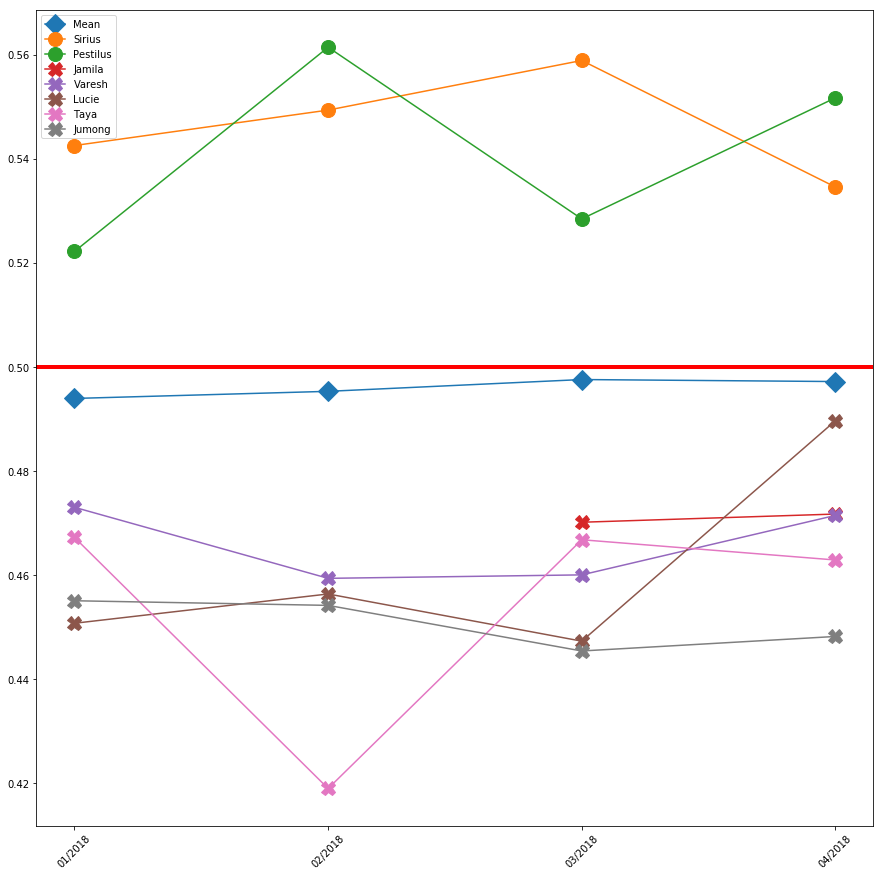

In [25]:
monitor(ranked, strong_list, weak_list)

<a id='monitor2'></a>
### Simulated update
#### Description:
> Once game developers have an idea of which characters they need to adjust, they will create an update to implement the necessary changes.

> I will now simulate an update by creating random data.
<br> To keep things simple, I will only simulate ranked matches since we are only concerned with monitoring ranked matches </br>


#### Procedure:
> Simulate an update, and plot the changes
1. Determine how many entries of data to simulate
2. Simulate data and plot the changes

##### 1. Determine how many entries of data to simulate

In [26]:
ranked.set_index('date').resample('M').count()

,character,game_mode,league,match_id,ranked,win
date,,,,,,
2018-01-31,31000,31000,31000,31000,31000,31000
2018-02-28,31350,31350,31350,31350,31350,31350
2018-03-31,31306,31306,31306,31306,31306,31306
2018-04-30,22278,22278,22278,22278,22278,22278


> There are about 31000 entries of data for January, February, and March, so lets generate 31000 entries of data for May

##### 2. Simulate data and plot the changes

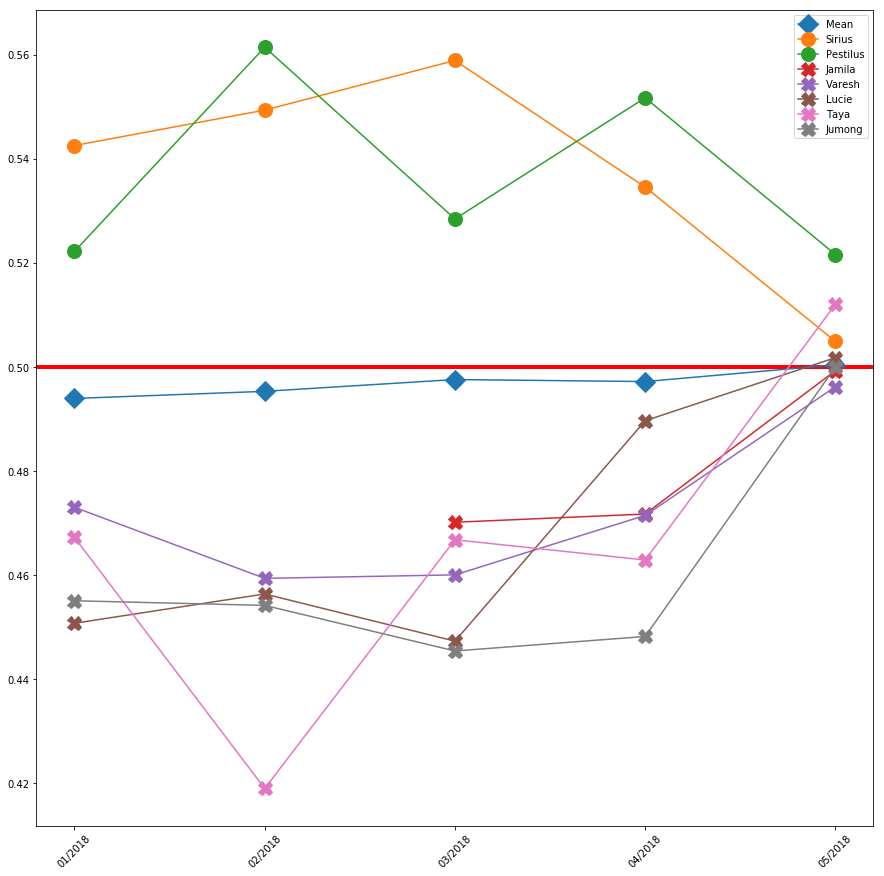

In [27]:
np.random.seed(30)

'''Generate data for each column'''
# Character column
character_list = np.random.choice(ranked.character, size=31000)

# Date column
base = datetime.datetime.strptime('2018-05-01', '%Y-%m-%d')
date_list = [days for x in range(31) for days in [base + datetime.timedelta(days=x)]*1000]

# Game_mode column
game_mode_list = np.random.choice([True, False], size=31000)

# League column
league_list = np.random.choice(ranked.league, size=31000)

# Match_id column
match_id_list = [np.nan]*31000

# Ranked column
ranked_list = [True]*31000

# Win column
win_list = np.random.choice(ranked.win, size=31000)

'''Create update data'''
# Zip columns together
data = list(zip(character_list, date_list, game_mode_list, league_list, match_id_list, ranked_list, win_list))
# Generate dataframe
update = pd.DataFrame(data = data, columns=['character', 'date', 'game_mode', 'league', 'match_id', 'ranked', 'win'])
# Concatenate data with previous data
update = pd.concat([ranked, update], ignore_index=True)

'''Plot the changes'''
monitor(update, strong_list, weak_list)

> Based on the plot above, it appears that the update was successful for the most part.
<br> Pestilus remains quite strong with a win rate greater than 52%, and requires a bit more work to bring him in line with the other characters. </br>
<br> Taya on the other hand, has been improved far too much, and will need some tweaking to stabilize her improvements. </br>
<br> The remaining characters of interest have been balanced quite well and are much closer to a 50% win rate. </br>
<br> The average win rates of all characters is now at 50%, meaning that the characters are much more balanced overall. </br>
<div class="alert alert-block alert-info">
Note:
<br>
It is important to note that this simulation was conducted for all ranked matches, meaning that the data includes both game modes (2v2, and 3v3) and all leagues (bronze, silver, ..., grand champion). This was done for simiplicity's sake, but it would be very easy to replicate this procedure if the game developers wanted to monitor a specific game mode, or specific leagues. </br>
</div>

<a id='conclusion'></a>
<div class="alert alert-block alert-warning"> 
<h1 align="center">Conclusion</h3>
</div>

> I have pulled data from the Battlerite API, and created a table to easily view the win rates and pick rates of each character by format (casual, ranked, etc.) and game mode (2v2, 3v3), which will allow game developers to get an overall sense of each character's current standing. 
<br> I then determined that there is a statistically significant difference between the win rates and pick rates of characters between game modes and leagues, which is an extremely important piece of information. This lets game developers know that they need to target different characters in different ways, so that there is no character bias between game modes or player skill. </br>
<br> I then determined which characters needed balance changes, and created a method to visualize their win rates over time, allowing game developers to monitor the most imbalanced characters before and after implementing updates. </br>

> Overall, I believe my work will prove extremely useful because it allows game developers to get a quick glance at the win rates and pick rates of each character in general, and also allows them to identify specific characters that need immediate changes.